In [6]:
import PyPDF2
import os
from os import listdir
from os.path import isfile,join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp=en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [7]:
mypath='Analytics'
onlyfiles=[os.path.join(mypath,f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,f))]
onlyfiles

['Analytics\\Akshay_Data Analytics.pdf',
 'Analytics\\Ananth_Data Analytics.pdf',
 'Analytics\\Ankur_Data Analytics.pdf',
 'Analytics\\Aparna_Data Analytics.pdf',
 'Analytics\\BNP Lakshmana Chowdary_Data Analytics.pdf',
 'Analytics\\Jayesh_Data Analytics.pdf',
 'Analytics\\Kanishk_Data Analytics.pdf',
 'Analytics\\Khushbu_Data Analytics.pdf',
 'Analytics\\Logesh_Data Analytics.pdf',
 'Analytics\\MAYANK_Data Analytics.pdf',
 'Analytics\\Prashant_Data Analytics.pdf',
 'Analytics\\Prateek_Data Analytics.pdf',
 'Analytics\\Raghav_Data Analytics.pdf',
 'Analytics\\Rini_Data Analytics.pdf',
 'Analytics\\Sanjay_Data Analytics.pdf',
 'Analytics\\Subhash_Data Analytics.pdf',
 'Analytics\\Tushar_Data Analytics.pdf',
 'Analytics\\Vinayak_Data Analytics.pdf',
 'Analytics\\VINOTH KUMAR_Data Analytics.pdf',
 'Analytics\\Vishal_Data Analytics.pdf',
 'Analytics\\Vishnu_Data Analytics.pdf']

In [8]:
import io
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage


def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text



In [9]:
passed=[]
for i in range(len(onlyfiles)):
    
    try:
        convert_pdf_to_txt(onlyfiles[i])
        passed.append(onlyfiles[i])
        print("success")
    except:
        pass
len(onlyfiles[1])


success
success
success
success
success
success
success
success


35

In [10]:
passed


['Analytics\\Akshay_Data Analytics.pdf',
 'Analytics\\Ananth_Data Analytics.pdf',
 'Analytics\\BNP Lakshmana Chowdary_Data Analytics.pdf',
 'Analytics\\Jayesh_Data Analytics.pdf',
 'Analytics\\Kanishk_Data Analytics.pdf',
 'Analytics\\Khushbu_Data Analytics.pdf',
 'Analytics\\Prashant_Data Analytics.pdf',
 'Analytics\\Vishnu_Data Analytics.pdf']

In [11]:
def pdfextract(file):
    fileReader=PyPDF2.PdfFileReader(open(file,'rb'))
    countPage=fileReader.getNumPages()
    count=0
    text=[]
    while count<countPage:
        pageObj=fileReader.getPage(count)
        count+=1
        t=pageObj.extractText() + '\n'
         # Collapse whitespace
        content = " ".join(t.replace("\xa0", " ").strip(',').split())
        #print(t)
        text.append(content)
    return text

In [12]:
convert_pdf_to_txt(passed[0])

"Akshay JAIN\nChennai, Kota\n\nPython\n\nDatabase Management \nSystem (DBMS)\n\nC++ Programming\n\nComputer Networking\n\nSQL\n\nHTML\n\nJava\n\nAPPLIED\n22 Jan'19\n\nData Structures\n\nC Programming\n\njQuery\n\nAssessment\nQ1. Why should you be hired for this internship?\nI'm was really bad at maths in my childhood.But my father always encourages me to keep trying at one \npoint of time maths was the subject i never wanted to study but slowly with time i started understanding \nthe maths and then it turned into fun for me. from then on maths become my favourite subject and in \ncollege i started studying about data science. Now data science is my passion.I love to play with it.\n\nQ2. Are you available for 6 months, starting immediately, for a full time internship at Chennai or \nBangalore? If not, what is the time period you are available for and the earliest date you can start \nthis internship on? Please also mention your preferred location. \nYes,I'm available from january 2019\n

In [13]:

doc = nlp(u'Give it back! He pleaded.')
token = doc[0]
type(doc)
#convert_pdf_to_txt(onlyfiles[3])
#pdfextract(onlyfiles[3])

spacy.tokens.doc.Doc

In [20]:
data=pd.read_csv('skill_dict.csv')
#data['Statistics']
#stat_word=[nlp(text) for text in data["Statistics"].dropna(axis=0)]
#stat_word.append(nlp(u'bayesian'))
#stat_word
# Creating the first Dataframe using dictionary 
#df1 = pd.DataFrame({"a":[1, 2, 3, 4],   "b":[5, 6, 7, 8]}) 
data.append({'Statistics':'exponential'},ignore_index=True)

,Statistics,machine learning,deep learning,r language,python language,NLP,data engineering
0,Statistical modeling,linear regression,neural network,r,python,nlp,aws
1,Statistical model,logistic regression,keras,ggplot,flask,natural language processing,ec2
2,probability,k-means,theano,shiny,django,topic modeling,amazon redshift
3,normal distribution,random forest,face detection,cran,pandas,lda,s3
4,poisson distribution,xgboost,neural network,dplyr,numpy,name entity recognition,docker
5,survival models,naïve bayes,convolutional neural network,tidyr,scikitlearn,pos tagging,kubernetes
6,hypothesis testing,pca,recurrent neural network,lubridate,sklearn,word2vec,scala
7,bayesian inference,decision trees,object detection,knitr,matplotlib,word embedding,teradata
8,factor analysis,svd,yolo,NaN,scipy,fsi,scala
9,forecasting,ensemble models,gpu,NaN,bokeh,spacy,google big query


In [21]:

def createProfile(file):
    text=convert_pdf_to_txt(file)
    text=str(text)
    text=text.replace("\\n"," ")
    text=text.lower()
    #print("------------------------printing text--------------------")
    #print(text)
    keyword_dict=pd.read_csv("skill_dict.csv")
    stat_word=[nlp(text) for text in keyword_dict["Statistics"].dropna(axis=0)]
    #stat_word=[nlp(text) for text in d]
    #print(type(stat_word))
    #stat_word.extend('bayesiannetwork')
    nlp_word=[nlp(text) for text in keyword_dict["NLP"].dropna(axis=0)]
    ml_word=[nlp(text) for text in keyword_dict["machine learning"].dropna(axis=0)]
    python_word=[nlp(text) for text in keyword_dict["python language"].dropna(axis=0)]
    r_word=[nlp(text) for text in keyword_dict["r language"].dropna(axis=0)]
    dl_word=[nlp(text) for text in keyword_dict["deep learning"].dropna(axis=0)]
    dataeng_word=[nlp(text) for text in keyword_dict["data engineering"].dropna(axis=0)]
    
    matcher=PhraseMatcher(nlp.vocab)
    matcher.add('Stats',None,*stat_word)
    matcher.add('R',None,*r_word)
    matcher.add('NLP',None,*nlp_word)
    matcher.add('ML',None,*ml_word)
    matcher.add('Python',None,*python_word)
    matcher.add('DL',None,*dl_word)
    matcher.add('DataEngg',None,*dataeng_word)
    doc=nlp(text)
    
    d=[]
    matches=matcher(doc)
    for match_id,start,end in matches:
        rule_id=nlp.vocab.strings[match_id]
        span=doc[start:end]
        d.append((rule_id,span.text))
    keywords="\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    df=pd.read_csv(StringIO(keywords),names=['Keywords_list'])
    
    df1=pd.DataFrame(df.Keywords_list.str.split(' ',1).tolist(),columns=['Subject','Keyword'])
    df2=pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns=['Keyword','Count'])
    df3=pd.concat([df1['Subject'],df2['Keyword'],df2['Count']],axis=1)
    df3['Count']=df3['Count'].apply(lambda x:x.rstrip(")"))
    #print(df)
    #print(df1)
    #print(df2)
    #print(df3)
    base=os.path.basename(file)
    filename=os.path.splitext(base)[0]
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
    #return text
    return(dataf)

In [377]:
#stat_word
onlyfiles[2]
createProfile(passed[0])

,Candidate Name,Subject,Keyword,Count
0,akshay,Python,python,3
1,akshay,DataEngg,sql,3
2,akshay,R,r,1


In [378]:
#ata_=createProfile(passed[0]
text=convert_pdf_to_txt(passed[0])
text=str(text)
text=text.replace("\\n"," ")
text=text.replace(""",""" , " " )
text=text.lower()
print("------------------------printing text--------------------")
print(text)
#ata_

------------------------printing text--------------------
akshay jain
chennai  kota

python

database management 
system (dbms)

c++ programming

computer networking

sql

html

java

applied
22 jan'19

data structures

c programming

jquery

assessment
q1. why should you be hired for this internship?
i'm was really bad at maths in my childhood.but my father always encourages me to keep trying at one 
point of time maths was the subject i never wanted to study but slowly with time i started understanding 
the maths and then it turned into fun for me. from then on maths become my favourite subject and in 
college i started studying about data science. now data science is my passion.i love to play with it.

q2. are you available for 6 months  starting immediately  for a full time internship at chennai or 
bangalore? if not  what is the time period you are available for and the earliest date you can start 
this internship on? please also mention your preferred location. 
yes i'm available

In [379]:
#import re
#lst = re.findall('\S+@\S+', text)  
#lst

In [380]:
import re
def phno(text):
    ph=[]
    for i in re.findall(r"\(?\b[2-9][0-9]{2}\)?[-. ]?[2-9][0-9]{2}[-. ]?[0-9]{4}\b", text):
        ph.append(i)
    return ph

In [381]:
#import spacy
#en = spacy.load('en_core_web_md')

#document = en(text)
#people = [ee for ee in sents.ents if ee.label_ == 'PERSON']
#list(document.ents)

#entities = [e.string for e in document.ents if 'PERSON'==e.label_] 
#entities = list(entities) 
#print (entities)

In [382]:

#def f(s, pat):
#    pat = r'(\w*%s\w*)' % pat       # Not thrilled about this line
#    return re.findall(pat, s)

#f(text,'.github.')

In [383]:

try:
    final_database=pd.DataFrame()
    for i in range(len(onlyfiles)):
        file=onlyfile[i]
        print(file)
        dat=createProfile(file)
        print(dat)
        final_database = final_database.append(dat)
except:
    pass
final_database

""


In [384]:
from contextlib import suppress

with suppress(Exception):

    final_database=pd.DataFrame()
    i = 0 
    
    while i < len(passed):
        file = passed[i]
        dat = createProfile(file)
        final_database = final_database.append(dat)
        i +=1

    #print(final_database)
final_database

,Candidate Name,Subject,Keyword,Count
0,akshay,Python,python,3
1,akshay,DataEngg,sql,3
2,akshay,R,r,1
0,ananth,R,r,3
1,ananth,DataEngg,sql,2
2,ananth,Python,python,3
0,bnp lakshmana chowdary,DataEngg,sql,1
1,bnp lakshmana chowdary,R,r,2
2,bnp lakshmana chowdary,Python,python,1
0,jayesh,Python,python,4


In [411]:
final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
final_database2

Subject,Candidate Name,DL,DataEngg,ML,NLP,Python,R,Stats
0,akshay,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,ananth,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,bnp lakshmana chowdary,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,jayesh,1.0,2.0,3.0,2.0,1.0,1.0,1.0
4,kanishk,1.0,1.0,0.0,3.0,1.0,1.0,0.0
5,khushbu,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,prashant,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,vishnu,0.0,2.0,0.0,0.0,1.0,1.0,0.0


In [386]:
#Resume summary
def summary(file):
    base=os.path.basename(file)
    filename=os.path.splitext(base)[0]
    text=convert_pdf_to_txt(file)
    text=str(text)
    text=text.replace("\\n"," ")
    text=text.lower()
    print("Name:"+filename)
    
    print("Phone Number:")
    print(phno(text+'\n'))
    
    print('Profile Info:')
    print(f(text,'.github.io'))
    
    print('Skills:')
    skl=createProfile(file)
    print(list(skl['Keyword']))
for i in range(len(passed)):
    print(summary(passed[i]))

Name:Akshay_Data Analytics
Phone Number:
['8118804180']
Profile Info:
[]
Skills:
['python ', 'sql ', 'r ']
None
Name:Ananth_Data Analytics
Phone Number:
['8686525102']
Profile Info:
[]
Skills:
['r ', 'sql ', 'python ']
None
Name:BNP Lakshmana Chowdary_Data Analytics
Phone Number:
['9014140147']
Profile Info:
[]
Skills:
['sql ', 'r ', 'python ']
None
Name:Jayesh_Data Analytics
Phone Number:
['8169778796']
Profile Info:
[]
Skills:
['python ', 'hadoop ', 'r ', 'nlp ', 'linear regression ', 'logistic regression ', 'probability ', 'random forest ', 'neural network ', 'natural language processing ', 'sql ']
None
Name:Kanishk_Data Analytics
Phone Number:
[]
Profile Info:
[]
Skills:
['python ', 'nlp ', 'sql ', 'r ', 'natural language processing ', 'sentiment analysis ', 'face detection ']
None
Name:Khushbu_Data Analytics
Phone Number:
['7762930683']
Profile Info:
[]
Skills:
['python ', 'sql ', 'r ']
None
Name:Prashant_Data Analytics
Phone Number:
[]
Profile Info:
[]
Skills:
['sql ', 'r ', 'pyt

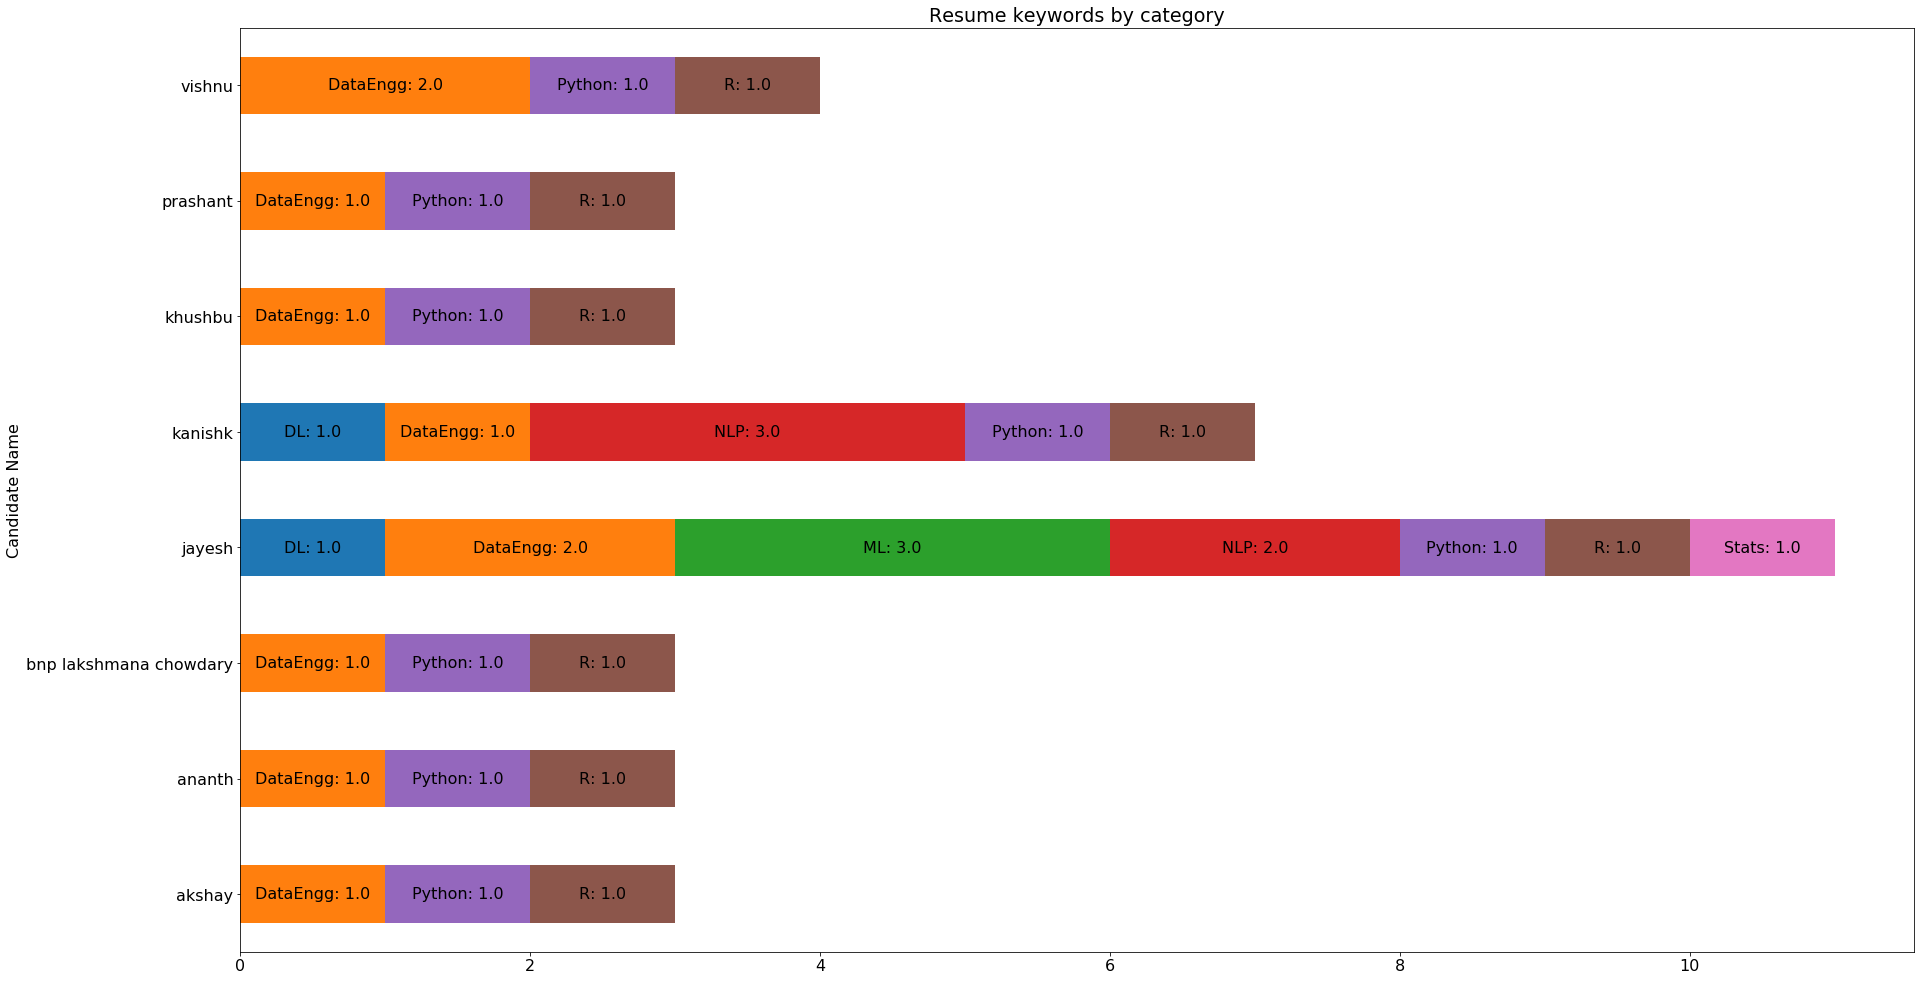

In [387]:

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
sample2=new_data.to_csv('sampleresume.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(30,17), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()

In [412]:
fin=final_database2
fin

Subject,Candidate Name,DL,DataEngg,ML,NLP,Python,R,Stats
0,akshay,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,ananth,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,bnp lakshmana chowdary,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,jayesh,1.0,2.0,3.0,2.0,1.0,1.0,1.0
4,kanishk,1.0,1.0,0.0,3.0,1.0,1.0,0.0
5,khushbu,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,prashant,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,vishnu,0.0,2.0,0.0,0.0,1.0,1.0,0.0


In [413]:
#set weightage
python=r=dataeng=ml=nlp=1



In [414]:
fin['score']=fin.sum(axis=1)
fin

Subject,Candidate Name,DL,DataEngg,ML,NLP,Python,R,Stats,score
0,akshay,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
1,ananth,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
2,bnp lakshmana chowdary,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
3,jayesh,1.0,2.0,3.0,2.0,1.0,1.0,1.0,11.0
4,kanishk,1.0,1.0,0.0,3.0,1.0,1.0,0.0,7.0
5,khushbu,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
6,prashant,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
7,vishnu,0.0,2.0,0.0,0.0,1.0,1.0,0.0,4.0


In [462]:
Rank=pd.DataFrame()
Rank=fin[['Candidate Name','DL']]
res=Rank.sort_values("DL",ascending=False)

Rank=fin[['Candidate Name','DataEngg']]
res1=Rank.sort_values("DataEngg",ascending=False)

Rank=fin[['Candidate Name','ML']]
res2=Rank.sort_values("ML",ascending=False)

Rank=fin[['Candidate Name','NLP']]
res3=Rank.sort_values("NLP",ascending=False)

Rank=fin[['Candidate Name','Python']]
res4=Rank.sort_values("Python",ascending=False)

Rank=fin[['Candidate Name','R']]
res5=Rank.sort_values("R",ascending=False)

#model=pd.concat([res,res1,res2,res3,res4,res5])
#df[(df != 0).all(1)]
res = res[(res != 0).all(1)]
res1 = res1[(res1 != 0).all(1)]
res2 = res2[(res2 != 0).all(1)]
res3 = res3[(res3 != 0).all(1)]
res4 = res4[(res4 != 0).all(1)]
res5 = res5[(res5 != 0).all(1)]

result=pd.DataFrame()
#result=result.append([res,res1,res2])
#result
print(res)
print(res1)
print(res2)
print(res3)
print(res4)
print(res5)

Subject Candidate Name   DL
3               jayesh  1.0
4              kanishk  1.0
Subject          Candidate Name  DataEngg
3                        jayesh       2.0
7                        vishnu       2.0
0                        akshay       1.0
1                        ananth       1.0
2        bnp lakshmana chowdary       1.0
4                       kanishk       1.0
5                       khushbu       1.0
6                      prashant       1.0
Subject Candidate Name   ML
3               jayesh  3.0
Subject Candidate Name  NLP
4              kanishk  3.0
3               jayesh  2.0
Subject          Candidate Name  Python
0                        akshay     1.0
1                        ananth     1.0
2        bnp lakshmana chowdary     1.0
3                        jayesh     1.0
4                       kanishk     1.0
5                       khushbu     1.0
6                      prashant     1.0
7                        vishnu     1.0
Subject          Candidate Name    R
0